In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset
from dataclasses import dataclass
import matplotlib.pyplot as plt


class GaussDeconvDataset(Dataset):

    def __init__(self, num_samples, scale):
        
        self.scale = scale
        self.num_samples = num_samples

        self.get_truth_data()
        self.get_covariance_data()
        self.get_target_data()

    def __getitem__(self, idx):
        output = {}
        output['target'] = self.smeared[idx]
        output['source'] = self.source[idx]
        output['covariance'] = self.covariance[idx]
        return output

    def __len__(self):
        return self.target.size(0)
    
    def __iter__(self):
        for i in range(len(self)):
            yield self[i]

    def get_truth_data(self):
        self.truth = torch.randn(self.num_samples)

    def get_covariance_data(self):
        s = torch.tensor(1 / (self.scale + 1e-6)) # this parametrization of the log-normal scale is to recover no smearing when scale = 0                     
        log_normal = torch.distributions.log_normal.LogNormal(loc=self.truth, scale=s)  
        self.covariance = log_normal.sample()

    def get_target_data(self):
        self.smeared = self.truth + self.covariance * torch.randn(self.num_samples)  

    def get_source_data(self):
        self.source = torch.randn(self.num_samples)


In [2]:
dataset = GaussDeconvDataset(num_samples=50000, scale=1.0)

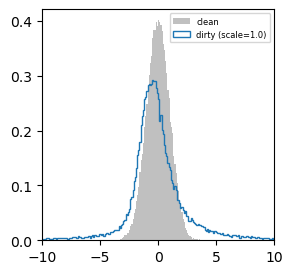

In [3]:
# plot distributions histograms

xlim=(-10,10)

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
plt.hist(dataset.truth, bins=np.arange(*xlim, 0.1), density=True, label='clean', color='silver')
plt.hist(dataset.smeared, bins=np.arange(*xlim, 0.1), density=True, label='dirty (scale={})'.format(dataset.scale), histtype='step')
ax.legend(fontsize=6)
plt.xlim(*xlim)
plt.show()